## 텍스트 유사도 분석

### ------------------------------------------------------------------------------------------------------------------------------------------------------
### 데이터 : Quora Question Pairs
### 데이터 출처 : https://www.kaggle.com/c/quora-question-pairs/data

### 분석 목적 : 이미 중복된 질문을 확인하여 이미 잘 작성된 답변을 사용자들이 참고하게 하여 더 좋은 서비스를 제공
### ------------------------------------------------------------------------------------------------------------------------------------------------------

# ZIP 파일 압축 해제

In [2]:
import zipfile

DATA_IN_PATH = './data/'
file_list = ['train.csv.zip', 'test.csv.zip', 'sample_submission.csv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

# EDA

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# 1. 데이터 파일 확인

In [2]:
train_data = pd.read_csv('./data/train.csv')

In [3]:
train_data.head()
# id = 고유한 인덱스 값
# qid1 & qid2 = 각 질문의 고유한 인덱스 값
# question1 & question2 = 각 질문의 내용
# is_duplicate = 0 은 두개의 질문이 중복이 아님
# is_duplicate = 1 은 두개의 질문이 중복임

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
train_data['question1'][0]

'What is the step by step guide to invest in share market in india?'

In [5]:
train_data['question2'][0]

'What is the step by step guide to invest in share market?'

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set
# 각 질문을 리스트로 만든 뒤, 하나의 시리즈 데이터 타입으로 만든다.

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
5         Astrology: I am a Capricorn Sun Cap moon and c...
6                                       Should I buy tiago?
7                            How can I be a good geologist?
8                           When do you use シ instead of し?
9         Motorola (company): Can I hack my Charter Moto...
10        Method to find separation of slits using fresn...
11              How do I read and find my YouTube comments?
12                     What can make Physics easy to learn?
13              What was your first sexual experience like?
14        What are the laws to change your status from a...
15        What would a Trump presidency mean for current...
16                             What does

In [8]:
print('train_set의 질문 수: {}'.format(len(train_set)))
print('교육 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('중복되어 있는 데이터의 수: {}'.format((len(train_set)-len(np.unique(train_set)))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts()>1)))

train_set의 질문 수: 808580
교육 데이터의 총 질문 수: 537361
중복되어 있는 데이터의 수: 271219
반복해서 나타나는 질문의 수: 111873


# 2. 시각화

## 히스토그램

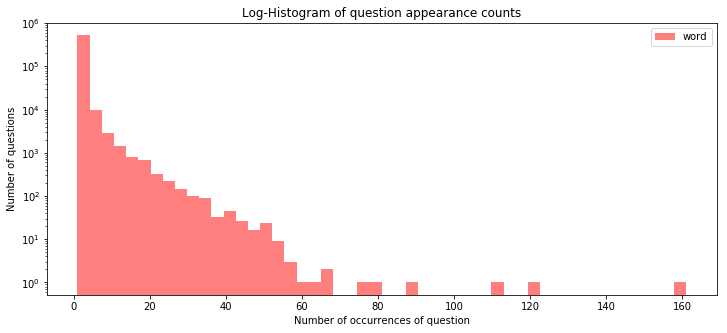

In [9]:
# x축 = 중복 개수
# y축 = 동일한 중복 횟수를 가진 질문의 개수


plt.figure(figsize=(12,5))
# 그래프에 대한 이미지 사이즈 선언
# figsize(가로, 세로) 형태의 튜플로 입력
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.legend()
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')
plt.show()
# bins = 히스토그램 값들에 대한 버켓 범위
# range = x축의 범위
# alpha = 그래프 색상 투명도
# color = 그래프 색상
# label = 그래프에 대한 라벨
# nonposx(무보험) nonposy(무분별한) : { '마스크', '클립'}
# x 또는 y의 양수가 아닌 값은 유효하지 않은 것으로 마스크되거나 매우 작은 양수로 클리핑 될 수 있습니다

In [10]:
print('중복 최대 개수 : {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수 : {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수 : {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차 : {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이 : {}'.format(np.median(train_set.value_counts())))
print('제1사분위 중복 : {}'.format(np.percentile(train_set.value_counts(),25)))
print('제3사분위 중복 : {}'.format(np.percentile(train_set.value_counts(),75)))

중복 최대 개수 : 161
중복 최소 개수 : 1
중복 평균 개수 : 1.50
중복 표준편차 : 1.91
중복 중간길이 : 1.0
제1사분위 중복 : 1.0
제3사분위 중복 : 1.0


## 박스플롯

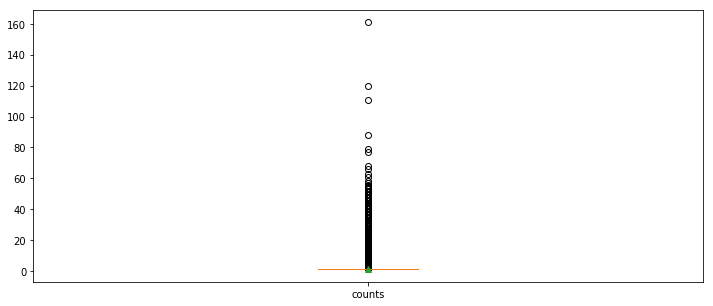

In [11]:
plt.figure(figsize=(12,5))
plt.boxplot([train_set.value_counts()],
           labels=['counts'],
            showmeans=True)
plt.show()

## 워드클라우드

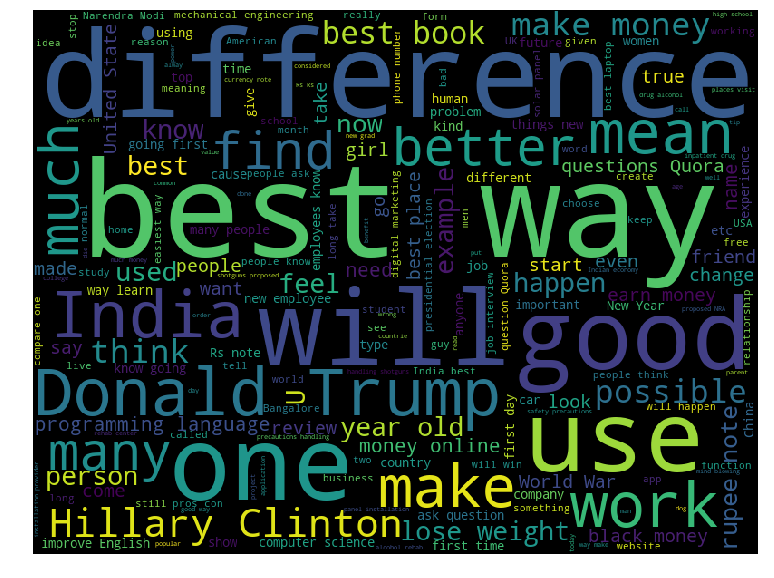

In [12]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
# generate 함수는 공백으로 분리된 문자열 리스트를 받는다
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

## 서브플롯

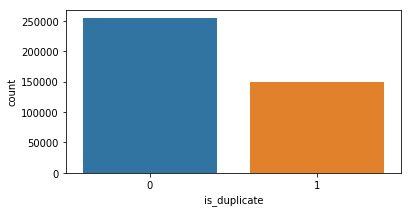

In [13]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['is_duplicate'])
### 불균형 데이터이므로 전처리 과정에서 라벨의 개수를 균형 있게 맞춰준 후 진행하자.

## 히스토그램

In [14]:
train_length = train_set.apply(len)

c:\python\python36\venv\kmu\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


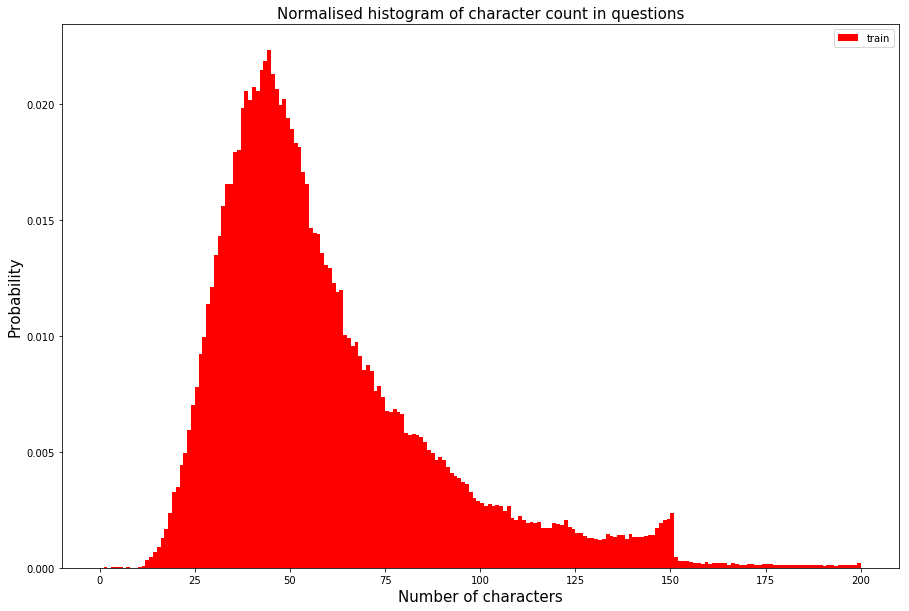

In [15]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', normed=True, label='train')
plt.title("Normalised histogram of character count in questions", fontsize=15)
plt.legend()
plt.xlabel("Number of characters", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.show()

In [16]:
print('질문 길이 최댓값 : {}'.format(np.max(train_length)))
print('질문 길이 평균값 : {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차 : {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간값 : {}'.format(np.median(train_length)))
print('질문 길이 제1사분위 : {}'.format(np.percentile(train_length,25)))
print('질문 길이 제3사분위 : {}'.format(np.percentile(train_length,75)))

질문 길이 최댓값 : 1169
질문 길이 평균값 : 59.82
질문 길이 표준편차 : 31.96
질문 길이 중간값 : 51.0
질문 길이 제1사분위 : 39.0
질문 길이 제3사분위 : 72.0


## 박스플롯

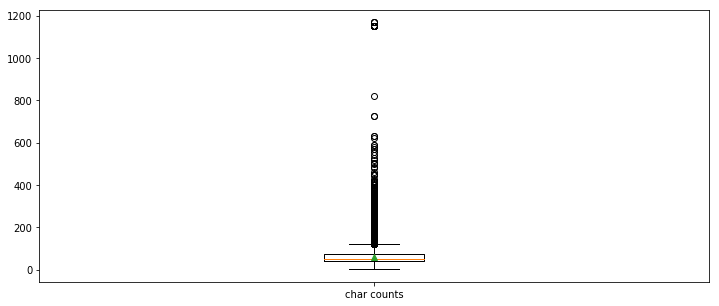

In [17]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['char counts'], showmeans=True)
plt.show()

## 단어 단위 히스토그램

In [18]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

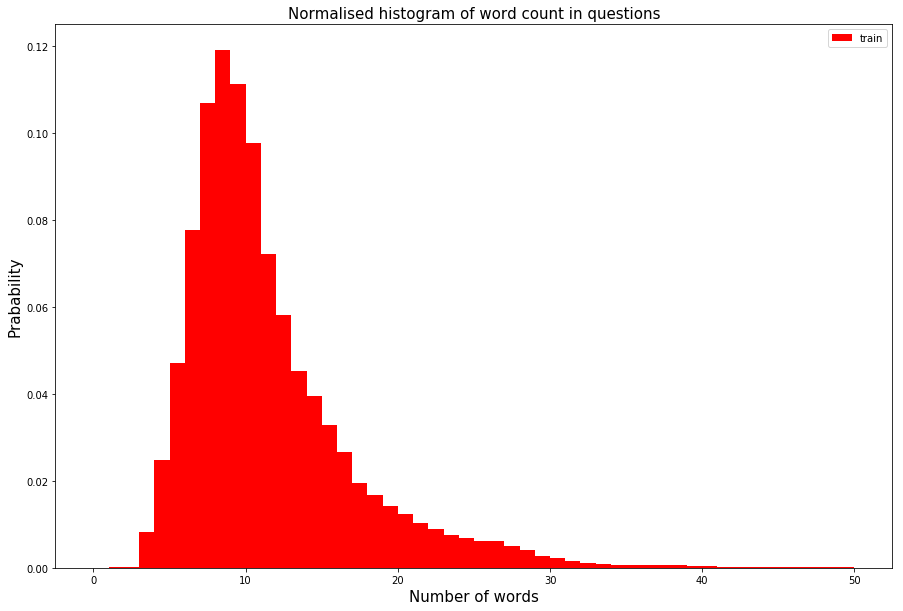

In [19]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0,50], facecolor='r', normed=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)
plt.show()

In [20]:
print("질문 단어 개수 최댓값 : {}".format(np.max(train_word_counts)))
print("질문 단어 개수 평균값 : {:.2f}".format(np.mean(train_word_counts)))
print("질문 단어 개수 표준편차 : {:.2f}".format(np.std(train_word_counts)))
print("질문 단어 개수 중간값 : {}".format(np.median(train_word_counts)))
print("질문 단어 개수 제1사분위 : {}".format(np.percentile(train_word_counts,25)))
print("질문 단어 개수 제3사분위 : {}".format(np.percentile(train_word_counts,75)))
print("질문 단어 개수 99퍼센트 : {}".format(np.percentile(train_word_counts,99)))

질문 단어 개수 최댓값 : 237
질문 단어 개수 평균값 : 11.06
질문 단어 개수 표준편차 : 5.89
질문 단어 개수 중간값 : 10.0
질문 단어 개수 제1사분위 : 7.0
질문 단어 개수 제3사분위 : 13.0
질문 단어 개수 99퍼센트 : 31.0


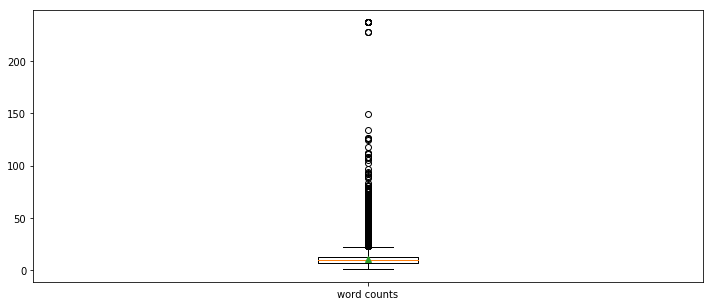

In [21]:
plt.figure(figsize=(12,5))

plt.boxplot(train_word_counts, labels=['word counts'], showmeans=True)
plt.show()

In [22]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x))
math = np.mean(train_set.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_set.apply(lambda x: '.' in x))
capital_first = np.mean(train_set.apply(lambda x : x[0].isupper()))
capitals = np.mean(train_set.apply(lambda x : max([y.isupper() for y in x])))
numbers = np.mean(train_set.apply(lambda x : max([y.isdigit() for y in x])))

print('# qmarks 물음표가 있는 질문 : {:.2f}'.format(qmarks * 100))
print('# math 수학 태그가 있는 질문 : {:.2f}'.format(math * 100))
print('# fullstop 질문이 가득 찼을 때 : {:.2f}'.format(fullstop * 100))
print('# capital_first 첫 글자가 대문자인 질문 : {:.2f}'.format(capital_first * 100))
print('# capitals 대문자가 있는 질문 : {:.2f}'.format(capitals * 100))
print('# numbers 숫자가 있는 질문 : {:.2f}'.format(numbers * 100))

# qmarks 물음표가 있는 질문 : 99.87
# math 수학 태그가 있는 질문 : 0.12
# fullstop 질문이 가득 찼을 때 : 6.31
# capital_first 첫 글자가 대문자인 질문 : 99.81
# capitals 대문자가 있는 질문 : 99.95
# numbers 숫자가 있는 질문 : 11.83


## 데이터 전처리

In [23]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [24]:
DATA_IN_PATH = './data/'

In [25]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding='utf-8')

## 데이터분포 균형 맞추기

In [26]:
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1] # 긍정 데이터 (1)
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0] # 부정 데이터 (0)

class_difference = len(train_neg_data) - len(train_pos_data) # 데이터 갯수의 차이 구하기
sample_frac = 1 - (class_difference / len(train_neg_data)) # 차이의 비율 구하기

train_neg_data = train_neg_data.sample(frac = sample_frac) # 비율만큼 train_neg_data에서 샘플링하여 개수 맞추기

In [27]:
print("중복 질문 개수 : {}".format(len(train_pos_data)))
print("중복이 아닌 질문 개수 : {}".format(len(train_neg_data)))

중복 질문 개수 : 149263
중복이 아닌 질문 개수 : 149263


## 텍스트 정제

In [28]:
train_data = pd.concat([train_neg_data, train_pos_data])

In [29]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
344288,344288,472489,472490,What's special about hindi language?,Why is Sanskrit the mother of all languages?,0
47600,47600,84965,84966,By how much does a Tesla car depreciate?,How do you calculate the depreciation value of...,0
315359,315359,440238,440239,"Why was my question ""How will the Attempted co...",What will the military coup in Turkey mean for...,0
235796,235796,346577,346578,What is the difference between a sponsor and a...,How do I get sponsors from local shops for a s...,0
28647,28647,53102,53103,What was Ultra during WW2?,Who was the best human during WW2?,0


In [30]:
FILTERS = "([~.,!?\"':;)(])"
change_filter = re.compile(FILTERS) # 패턴 객체를 만든다.

questions1 = [str(s) for s in train_data['question1']]
questions2 = [str(s) for s in train_data['question2']]

filtered_questions1 = list()
filtered_questions2 = list()

for q in questions1:
    filtered_questions1.append(re.sub(change_filter, "", q).lower())

for q in questions2:
    filtered_questions2.append(re.sub(change_filter, "", q).lower())

## 토크나이징

In [31]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)
# fit_on_texts : 텍스트 목록을 기반으로 내부 어휘 업데이트, 단어 빈도에 따른 색인을 만든다.

In [32]:
questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)
# texts_to_sequences : 일련의 정수로 변환한다.

## 패딩

In [33]:
MAX_SEQUENCE_LENGTH = 31 # EDA에서 단어 개수의 99퍼센트인 31값으로 설정.
q1_data = pad_sequences(questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [34]:
q1_data #모델에 적용하기 위해 특정 길이로 동일하게 맞춰야 한다.

array([[  70, 1047,   47, ...,    0,    0,    0],
       [  57,    4,   76, ...,    0,    0,    0],
       [  16,   60,   18, ...,    0,    0,    0],
       ...,
       [   4,   21,    7, ...,    0,    0,    0],
       [   2,   21, 7735, ...,    0,    0,    0],
       [   9,   15,  302, ...,    0,    0,    0]])

## 데이터의 저장

In [35]:
word_vocab = {}
word_vocab = tokenizer.word_index

labels = np.array(train_data['is_duplicate'], dtype=int)

print('Shape of question1 data : {}'.format(q1_data.shape))
print('Shape of question2 data : {}'.format(q2_data.shape))
print('Shape of label : {}'.format(labels.shape))
print('Words in index : {}'.format(len(word_vocab)))

Shape of question1 data : (298526, 31)
Shape of question2 data : (298526, 31)
Shape of label : (298526,)
Words in index : 76522


In [36]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

In [37]:
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA, 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

In [38]:
test_data = pd.read_csv('./data/test.csv', encoding='utf-8')
valid_ids = [type(x) ==int for x in test_data.test_id] 
test_data = test_data[valid_ids].drop_duplicates()

In [39]:
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1:
     filtered_test_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in test_questions2:
     filtered_test_questions2.append(re.sub(change_filter, "", q).lower())

In [40]:
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

test_q1_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [41]:
test_id = np.array(test_data['test_id'])

print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data:{}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (2345796, 31)
Shape of question2 data:(2345796, 31)
Shape of ids: (2345796,)


In [42]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA , 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA , 'wb'), test_id)